
<img src="https://i.ibb.co/1T5Wbn6/Banner-para-Linkedin-capa-de-perfil-para-programador.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=554192811435&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# BOXPLOT

## Objetivo:

* Plotar e analisar um gráfico do tipo `BOXPLOT`

### Metodologia/Passos

* Conectar a API do Kaggle e baixar um conjunto de dados aleatórios;
* Filtrar o conjunto de maneira a ficar uma distribuição univariada;
* Plotar um `BOXPLOT` e analisá-lo

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import statistics as stats
import math

In [11]:
# Instalando API Kaggle
!pip install kaggle --upgrade


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Encontrando diretório Py para instalar as credenciais Kaggle
import os
import sys

print(os.path.dirname(sys.executable))

c:\Users\manda\AppData\Local\Programs\Python\Python310


In [34]:
# Utilizando a API para baixar uma amostra policotomica de dados quantitativos, referente a salários de datascience. 
!kaggle datasets download -d milanvaddoriya/data-science-job-salary


  0%|          | 0.00/9.97k [00:00<?, ?B/s]
100%|██████████| 9.97k/9.97k [00:00<?, ?B/s]


In [125]:
# Descompactando o arquivo baixado
z = ZipFile('data-science-job-salary.zip', 'r')
z.extractall()
z.close()

In [129]:
# Criando um data frame
df = pd.read_csv('datascience_salaries.csv')

### Agora vamos dar uma olhada no nossa amostra

In [43]:
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [45]:
df.shape

(1171, 7)

In [47]:
df['job_title'].unique()

array(['Data scientist', 'Data analyst', 'Big data', 'Machine learning',
       'ML Ops'], dtype=object)

In [53]:
df['job_title'].value_counts()

Data scientist      394
Data analyst        368
Machine learning    289
Big data            101
ML Ops               19
Name: job_title, dtype: int64

In [130]:
# Tornando nossa amostra univariável
df = df[['job_title','salary']]
df.head(3)

,job_title,salary
0,Data scientist,149000
1,Data scientist,120000
2,Data scientist,68000


In [131]:
# Filtrando nossa amostra
df = df[(df['job_title'] == "Data analyst")]
df.head(10)

,job_title,salary
394,Data analyst,62000
395,Data analyst,51000
396,Data analyst,62000
397,Data analyst,51000
398,Data analyst,63000
399,Data analyst,48000
400,Data analyst,63000
401,Data analyst,63000
402,Data analyst,63000
403,Data analyst,63000


In [74]:
df.shape

(368, 2)

> Pronto, agora tenho uma amostra com 368 entradas, dados quantitativos referentes ao salário anual em dólar de analistas de dados pelo mundo.

# Agora vamos plotar o histograma

<AxesSubplot:>

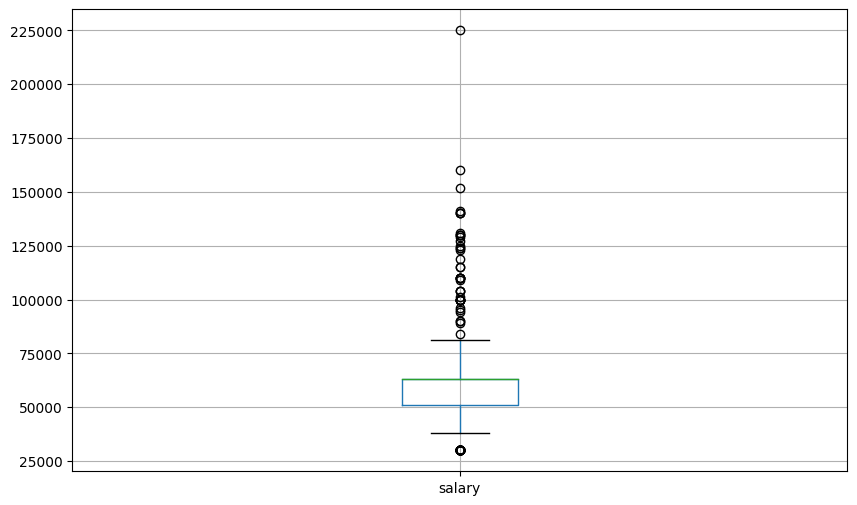

In [83]:
df.boxplot(column='salary', figsize=(10,6))

Os dados estão com muitos outliers, algo esta errado, vou dar uma olhada na variância

In [101]:
stats.variance(df['salary'])

642474284.7411444

In [132]:
# Vou mudar a nossa característica de ano para mês

df['salary'] = (df['salary']/12).round(0)
df['salary'] = df['salary'].astype(int)
df.head(5)

,job_title,salary
394,Data analyst,5167
395,Data analyst,4250
396,Data analyst,5167
397,Data analyst,4250
398,Data analyst,5250


In [137]:
desvio = int(math.sqrt(stats.variance(df['salary'])))
desvio # Quanto maior o desvio maior a heterogeneidade dos dados

2112

<AxesSubplot:>

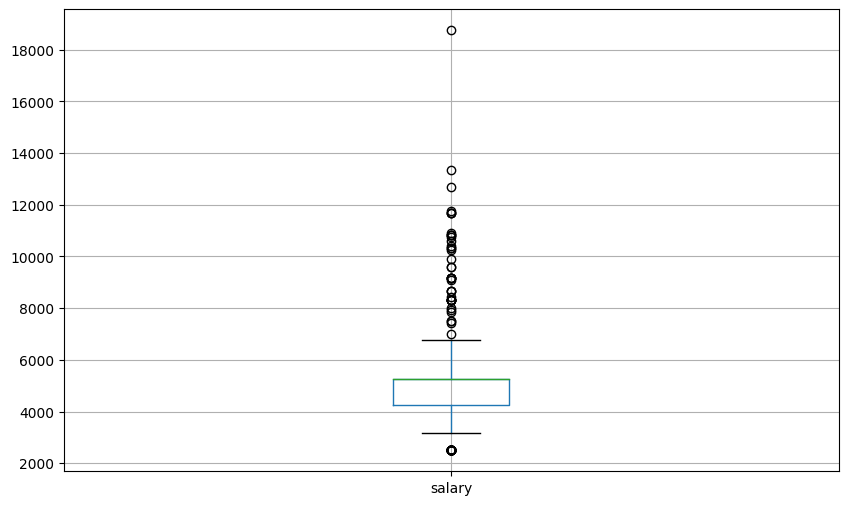

In [138]:
df.boxplot(column='salary', figsize=(10,6))

# Análise do Boxplot
* 50% dos salários estão entre U$ 4.000 e U$ 5.000/mês (representados no intervalo dentro da caixa) - podemos considerar a `moda` e `média` incluídas dentro deste `range`;

* Todavia existem consideráveis valores discrepantes, `outliers`, que recebem acima desta faixa salarial `US6.400,00`;

* Também podemos verificar a `baixa incidência` de salários `outliers` que recebem abaixo disto;

* Se alguém recebe acima do limite superior de aproximadamente  6.400,00 doláres/mês podemos considerar um `outlier superior`

* Se alguém recebe abaixo do limite inferior de aproximadamente 3.300,00  doláres/mês podemos considerar `outlier inferior`.

>